In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [97]:
df=pd.read_csv('Telco-Customer-Churn.csv')
pd.set_option('display.max_columns',100)
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [99]:
'''The TotalCharges is of type object because it has few blank values.So Change the value from ' ' to 0 '''
for i,j in enumerate(df['TotalCharges']):
    if j==' ':
       
        df['TotalCharges'][i]='0'
df['TotalCharges']=df['TotalCharges'].apply(lambda x:float(x))

In [100]:
df.sort_values('TotalCharges',ascending=False).head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4610,2889-FPWRM,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.80,Yes
4586,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
6768,9739-JLPQJ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),117.50,8670.10,No
5347,9788-HNGUT,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.95,8594.40,No
2187,8879-XUAHX,Male,0,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,116.25,8564.75,No


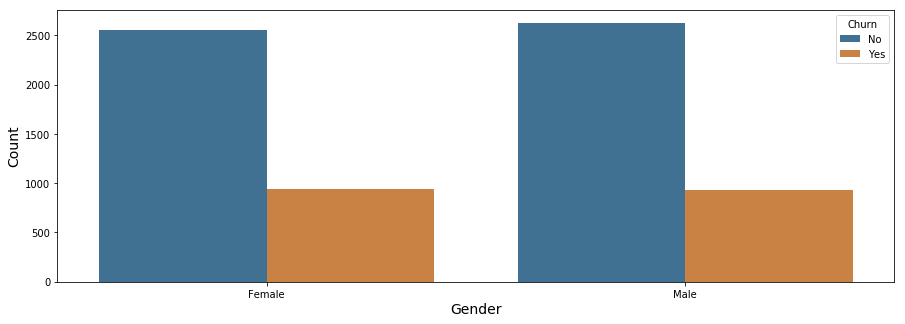

In [101]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['gender'],hue=df['Churn'],saturation=0.55)
plt.xlabel('Gender',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

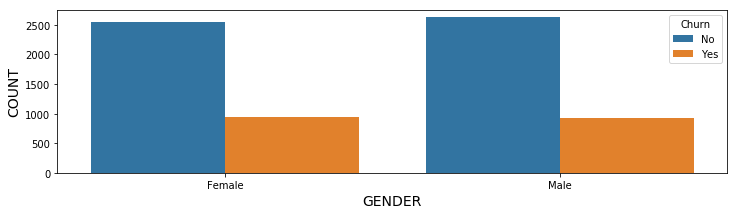

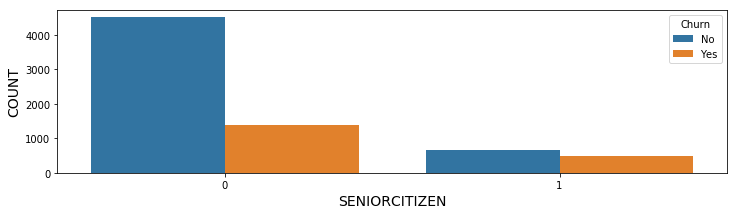

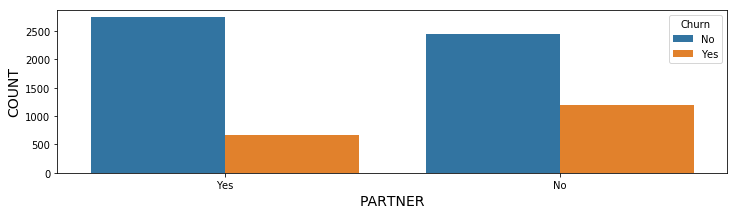

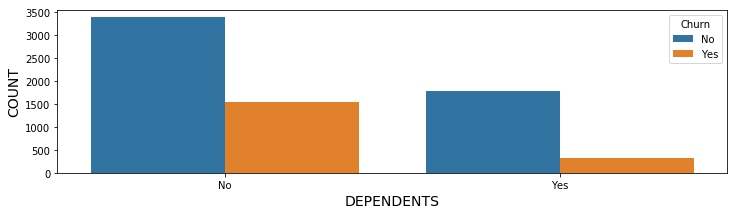

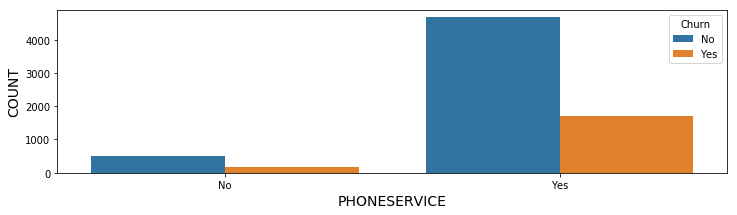

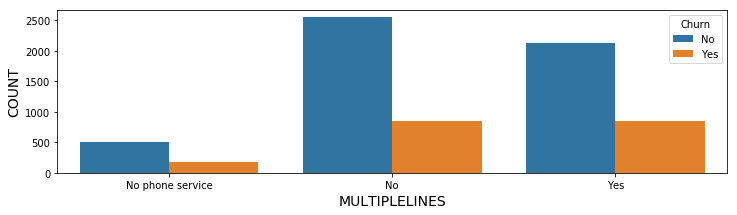

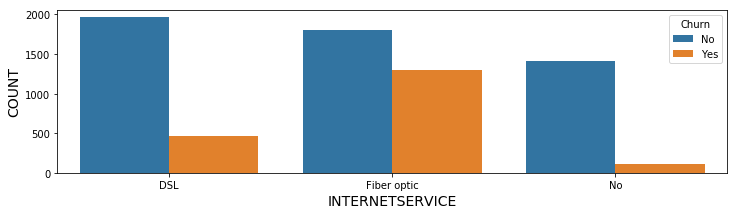

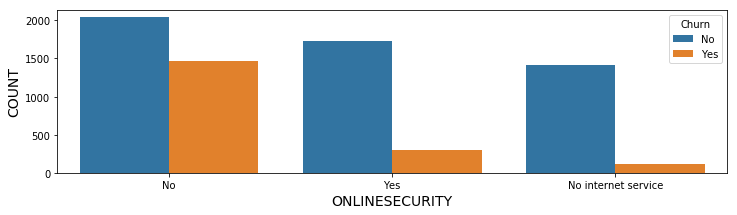

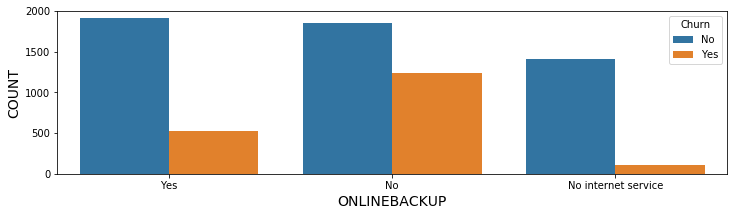

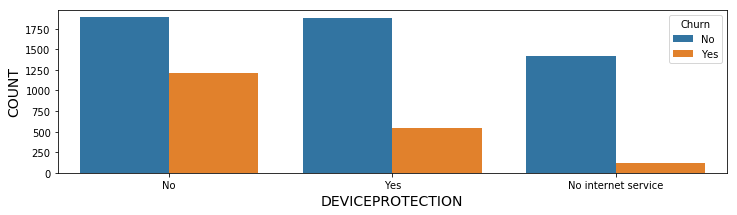

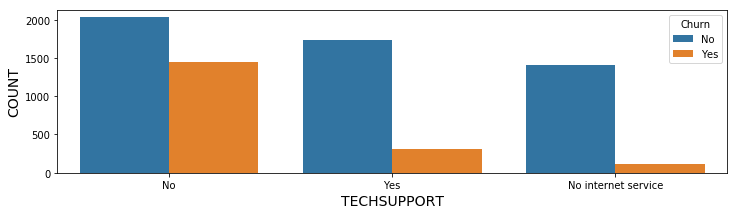

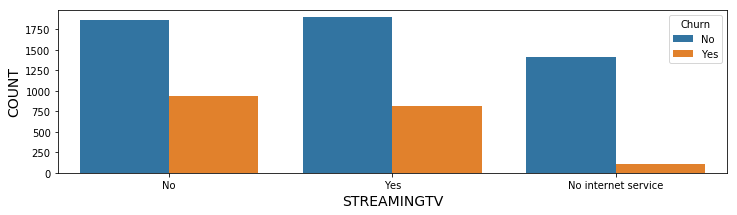

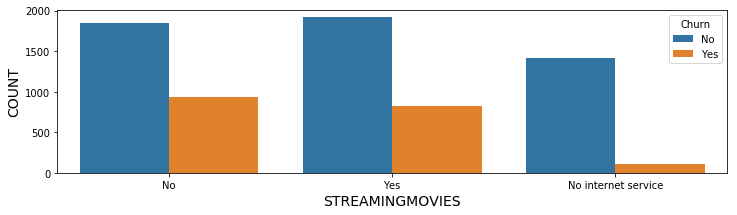

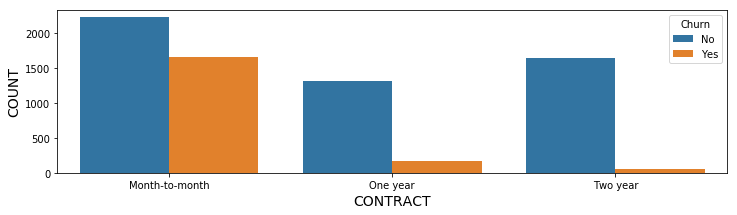

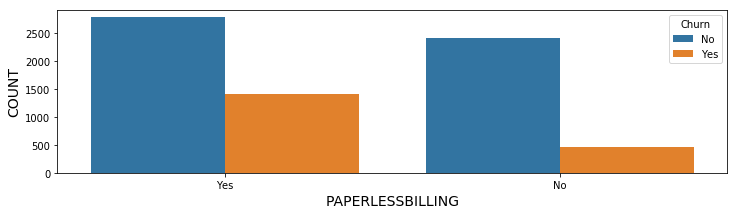

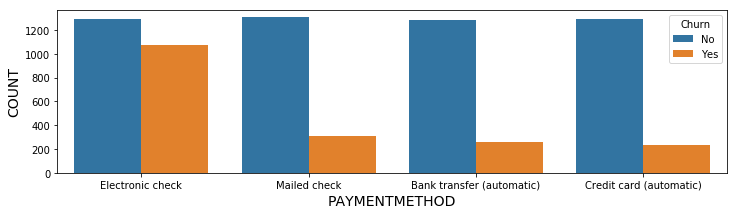

In [102]:
'''Function to create a count plot'''
def countplot(x,churn,columns):
    plt.figure(figsize=(12,3))
    ax=sns.countplot(x=x,hue=churn)
    plt.xlabel(i.upper(),fontsize=14)
    plt.ylabel('COUNT',fontsize=14)
    return ax


'''Plotting all the count plots who have less than 5 values in it and see if we have a correlation with the churn rate'''
churn=df['Churn']
for i in df.columns:
    if df[i].nunique()<5 and i!='Churn':
        countplot(df[i],churn,i)

Key Correlation of the Target Variable(Churning vs No Churning) with Different Feature Variables:

    1 -> Internet Service: Customer opting for fiber optic as the Internet Service are more likely to Churn. 
    2 -> Online Security: Customer with No Online Security are more likely to Churn.
    3 -> Online Backup: Customer with No Online BackUp are more likely to Churn.
    4 -> Device Protection: Customer with No Device Protection are more likely to Churn.
    5 -> Tech Support: Customer with No Tech Support are more likely to Churn.
    6 -> Contract: Customer with Month to Month Contract are more likely to Churn.
    7 -> PaperLess Billing: Customer with PaperLess Billing are more likely to Churn.
    
We see Streaming Movies and Streaming TV also have a lot of Customer's Churning but we cannot see any correlation yet because of the proportion of leaving whether they have that service or not is the same.I am guessing it might be because of the Price. We will explore more in detail later on and see if we can find any correlation.    

# Feature Engineering

In [103]:
                '''Creating the bin for the tenure column to see how it is related with churning''' 
    
def bins(x):
    if x<11:
        return 'Tenure 0_10'
    elif x<25:
        return 'Tenure 11_24'
    elif x<49:
        return 'Tenure 24_48'
    elif x<61:
        return 'Tenure 48_60'
    else:
        return 'Tenure_gt_60'
df['tenurebin']=df['tenure'].apply(lambda x:bins(x))  

In [104]:
                                    '''Calculating Total Services '''
    
totalservice=df[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]
TotalService=[]
for i in range(0,len(totalservice)):
    service=0
    for j in range(0,len(totalservice.iloc[1])):
        if totalservice.iloc[i][j]=='Yes':
            service=service+1
    TotalService.append(service)
df['TotalService']=TotalService     

# Functions


In [105]:
def scatterplot(feature,hue):
    f = sns.FacetGrid(df,hue=hue,aspect=2,size=4)
    f.map(plt.scatter,feature,"tenure")
    plt.xlabel(feature,fontsize=12)
    plt.ylabel('Tenure',fontsize=12)
    plt.title("{} vs Tenure".format(feature),fontsize=16)
    plt.show()
    
#------------------------------------------------------------------------------------------------------------------
def box(x,y,data,hue=None):
    plt.figure(figsize=(15,4))
    sns.boxplot(x=x,y=y,data=data,hue=hue)
    plt.tight_layout()
    
#------------------------------------------------------------------------------------------------------------------    
'''TEXT LABEL ON BOX PLOT'''
def boxlabel(x,y,df):
    
    plt.figure(figsize=(15,4))
    ax = sns.boxplot(x=x,y=y,data=df)
    ax.set_xlabel(x.upper(),fontsize=14)
    ax.set_ylabel(y.upper(),fontsize=14)

    # Calculate number of obs per group & median to position labels
    medians = df.groupby([x])[y].median().values
    nobs = df[x].value_counts().values
    nobs = [str(x) for x in nobs.tolist()]
    nobs = ["n: " + i for i in nobs]

    # Add it to the plot
    pos = range(len(nobs))
    for tick,label in zip(pos,ax.get_xticklabels()):
        ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],fontsize=14,horizontalalignment='center',
             verticalalignment='center',bbox=dict(facecolor='black', alpha=0.5),color='w')
    plt.show()
    
#------------------------------------------------------------------------------------------------------------------        
def barmeanlabel(x,y,df):
    plt.figure(figsize=(15,4))

    
    ax=df.groupby(x)[y].mean().plot(kind='bar')
    plt.title('Mean of {} for {} taken'.format(y,x),fontsize=14)
    for i in ax.patches:
        x,y=i.xy
        w=i.get_width()
        h=i.get_height()
        plt.text(x=x+w/2,y=h.max()*1/2,s=int(h),fontsize=10,horizontalalignment='center',verticalalignment='center',bbox=dict(facecolor='w', alpha=0.5))

#------------------------------------------------------------------------------------------------------------------
def barcountlabel(x,y,df):
    plt.figure(figsize=(15,4))
    ax=df.groupby(x)[y].count().plot(kind='bar')
    plt.title('Count of {}'.format(x),fontsize=14)
    for i in ax.patches:
        x,y=i.xy
        w=i.get_width()
        h=i.get_height()
        plt.text(x=x+w/2,y=h.max()*1/2,s=int(h),fontsize=10,horizontalalignment='center',verticalalignment='center',bbox=dict(facecolor='w', alpha=0.5))
#------------------------------------------------------------------------------------------------------------------    



# 1 -: Lets first see the Tenure Feature

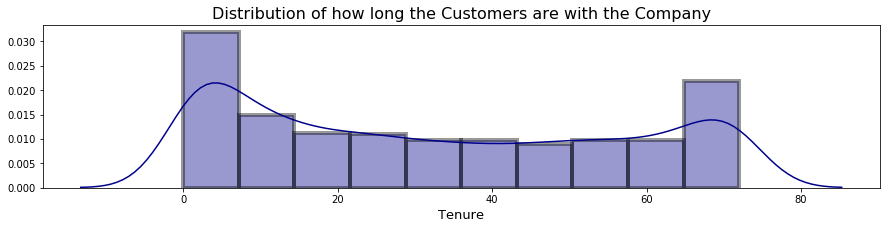

In [106]:
                '''Distribution of how long the customers are with the telecom company'''
plt.figure(figsize=(15,3))
sns.distplot(df['tenure'],bins=10,color='darkblue',hist_kws=dict(edgecolor="k",linewidth=4))
plt.xlabel('Tenure',fontsize=13)
plt.title('Distribution of how long the Customers are with the Company',fontsize=16)
plt.show()

It is a bimodal distribution i.e we have majority of our Customers recently enrolled(10-12) or are with us for a longer period of time.   

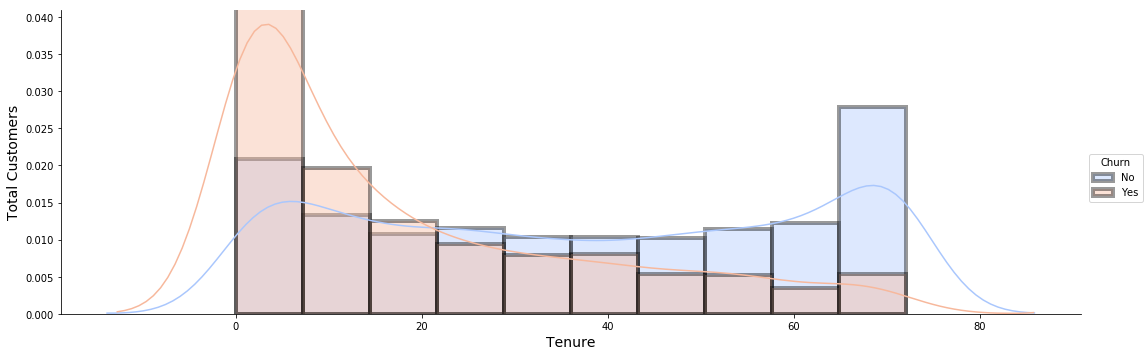

In [107]:
_,bins = np.histogram(df["tenure"])
g = sns.FacetGrid(df,hue="Churn",sharex=True,sharey=True,size=5,aspect=3,palette='coolwarm')
g = g.map(sns.distplot, "tenure", bins=bins,hist_kws=dict(edgecolor="k",linewidth=4))
g.set_titles('Churning vs Non Churning of the Customers based on their Tenure',fontsize=16)
g.set_xlabels('Tenure',fontsize=14)
g.set_ylabels('Total Customers',fontsize=14)
g.add_legend()
plt.show()

    Churn=Yes is a Rigth Skewed Distribution indicating Customers with less tenure are more likely to leave us.
    Churn=No indicates as the Time Period increases less likely our Customers will leave us.

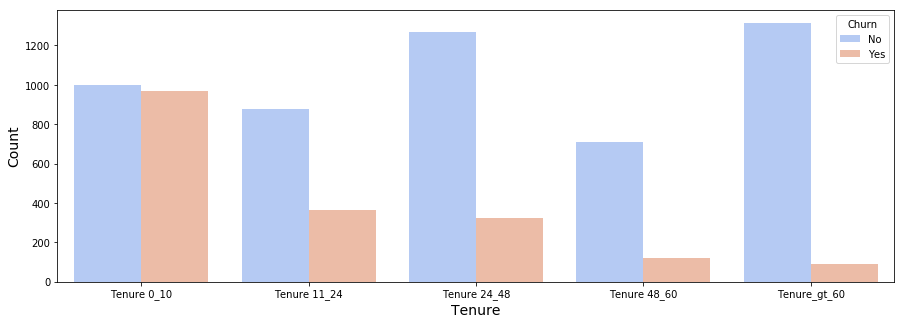

In [108]:
                             '''Another Way: Create our own bins range and see the distribution'''

plt.figure(figsize=(15,5))
sns.countplot(df['tenurebin'],hue=churn,order=['Tenure 0_10','Tenure 11_24','Tenure 24_48','Tenure 48_60','Tenure_gt_60']
              ,palette='coolwarm')
plt.xlabel('Tenure',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

We see more customers churn in the first 10 months.People who stays for a longer period of time are less likely to leave the service.So our focus should be on Customers with lesser tenure and find different reasons of them leaving us.

Let's perform Data Exploration only for Tenure 0_10. 

# Focus on Tenure 0_10 Months

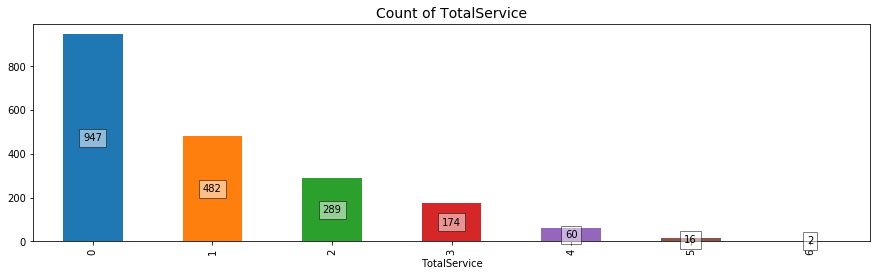

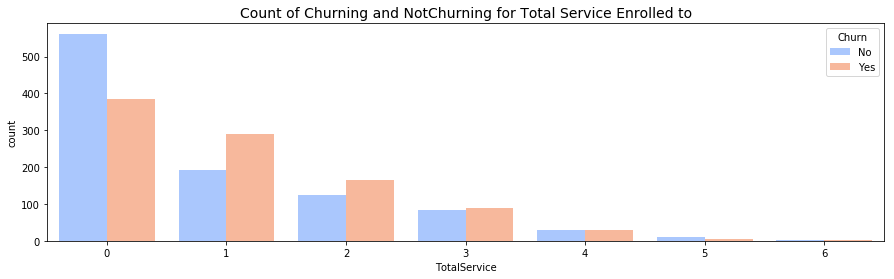

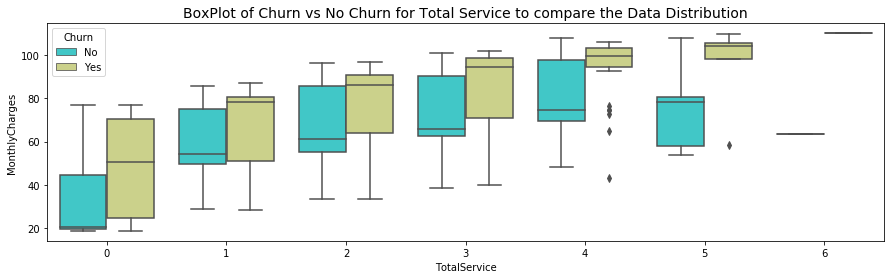

In [109]:
df_tenure_0to10=df[df['tenure']<11]

barcountlabel(x='TotalService',y='MonthlyCharges',df=df_tenure_0to10)

plt.figure(figsize=(15,4))
sns.countplot(x='TotalService',data=df_tenure_0to10,hue="Churn",palette='coolwarm',saturation=1.5)
plt.title('Count of Churning and NotChurning for Total Service Enrolled to',fontsize=14)
plt.show()

plt.figure(figsize=(15,4))
sns.boxplot(x='TotalService',y='MonthlyCharges',data=df_tenure_0to10,hue="Churn",palette='rainbow')
plt.title('BoxPlot of Churn vs No Churn for Total Service to compare the Data Distribution',fontsize=14)
plt.show()

    Plot 1 -> 50% of Customers have either No services or just 1 Service enrolled to.
    Plot 2 -> We observe that the Customers who are leaving are much more for 0 and 1 services.
    Plot 3 -> The Box Plot tells us the median salary for Customers Churning is much more than Customers who are Not.
              So one of the reason is paying more for same number of services.

There can be few services that are more costlier and hence they ended up paying more or there can be other features that might have increased their Monthly Charges.We will explore them later and see if it justifies the Customer's Churning.
But right now from the graphs we can conclude paying more MonthlyCharges than their counterparts for the same number of services is strongly correlated with customers to leave.


# Compare Entire Tenure with Tenure 0_10 Months

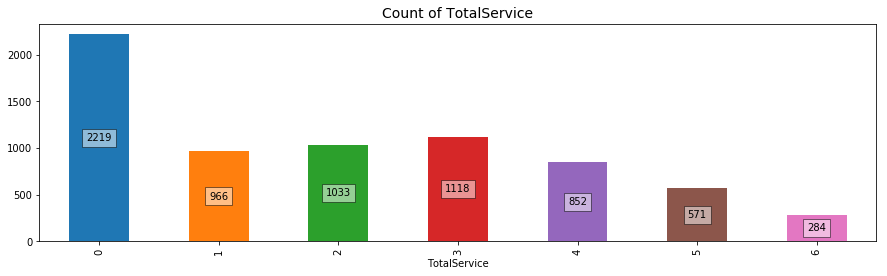

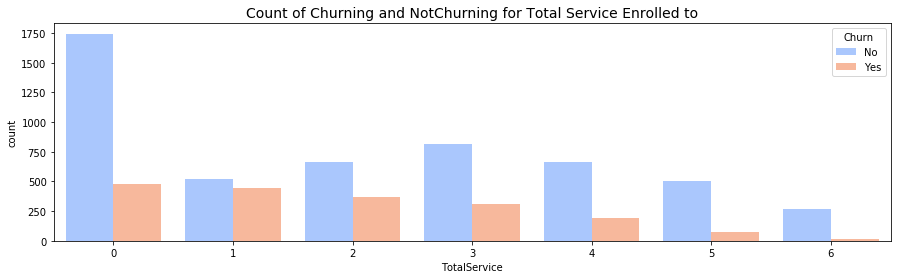

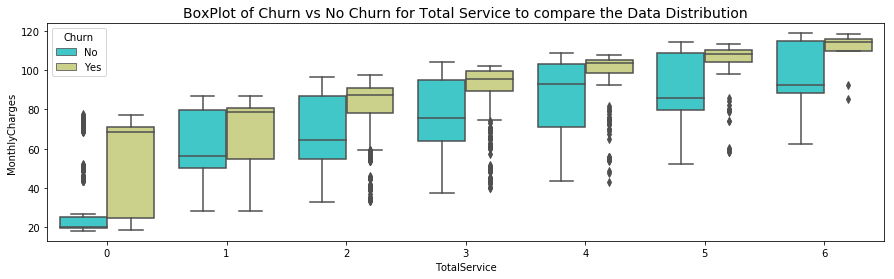

In [110]:

print(' ')

barcountlabel(x='TotalService',y='MonthlyCharges',df=df)

plt.figure(figsize=(15,4))
sns.countplot(x='TotalService',data=df,hue="Churn",palette='coolwarm',saturation=1.5)
plt.title('Count of Churning and NotChurning for Total Service Enrolled to',fontsize=14)
plt.show()

plt.figure(figsize=(15,4))
sns.boxplot(x='TotalService',y='MonthlyCharges',data=df,hue="Churn",palette='rainbow')
plt.title('BoxPlot of Churn vs No Churn for Total Service to compare the Data Distribution',fontsize=14)
plt.show()
print(' ')

Comparing the graphs of Entire Tenure Period with Tenure 0_10 Months:
    
    Plot 1 -> As Tenure increases we see Customers are Enrolled into more Services.None or 1 number of TotalService                 is not purely dominated.
    Plot 2 -> Churning rate is also reduced drastically.
    Plot 3 -> Box Plot is almost similar just the variance of the distibution decreases.

As observed earlier for same number of Services Enrolled into Customers are paying more and hence leaving.So lets see if we can find any Service that is costlier than other.

# Find Expensive Services

How will we approach this problem:

    Step 1: New DataFrame that has all the columns we need.
    Step 2: Lambda Function that calculates the AverageServiceCost by performing MonthlyCharges/TotalServices.
    Step 3: Drop all the records that have TotalService=0 and do not have any Internet Service.
    Step 4: Calculate the Mean of MonthlyCharges when TotalService=1 which means that we get a rough idea about the prices of each service(As that is the only service enrolled to)
    Step 5: Calculate the Mean of AverageServiceCost(Value From Step 2) and groupby Churn and InternetService inside a for loop that iterates to all the columns and only taken consideration when they have a value='Yes'.  

In [111]:
            '''Trying to find the Average Charges based on the Number of Services taken'''
#Step 1    
df_totalservicecharge=df[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                          'StreamingTV','StreamingMovies','TotalService','MonthlyCharges','Churn']]



#Step 2
df_totalservicecharge['ChargesperService']=df_totalservicecharge[['MonthlyCharges','TotalService']].apply(lambda x:x[0]/x[1] if x[1]>0 else x[0],axis=1)



#Step 3
'''Dropping rows that have Total Service=0 and Online Backup= No internet service(Others columns will also have no internet if one column has that value )'''
df_totalservicecharge=df_totalservicecharge.drop(df_totalservicecharge[(df_totalservicecharge['TotalService']==0) & (df_totalservicecharge['OnlineBackup']=='No internet service')].index)
df_totalservicecharge.head()



#Step 4 and 5
df['ChargesperService']=df_totalservicecharge['ChargesperService']
for cols in totalservice.columns:
    
    
    """print('               ***********************************{}***********************************'.format(cols))
        print()
        print('         Montly Charges of the Customer when {} is the only Enrolled Service'.format(cols))
        print('--------------------------------------------------------------------------------------------')
        print(df[(df[cols]=='Yes') & (df['TotalService']==1)].groupby(['InternetService','Churn'],as_index=False)['MonthlyCharges'].agg({'Mean':'mean',
                                                                                                   'Count':'count'}))"""
    
    if cols!='Churn':
        print(' ')
        print()
        print('         Average Cost of the Customers when {} is included in their Enrolled Services'.format(cols))
        print('----------------------------------------------------------------------------------------------------------')
        print(df[(df[cols]=='Yes')].groupby(['InternetService','Churn'],as_index=False)['ChargesperService'].agg({'Mean':'mean',
                                                                                                   'Count':'count'}))
        print(' ')
        print()

 

         Average Cost of the Customers when OnlineSecurity is included in their Enrolled Services
----------------------------------------------------------------------------------------------------------
  InternetService Churn       Mean  Count
0             DSL    No  20.485637   1068
1             DSL   Yes  26.593207    112
2     Fiber optic    No  29.571977    656
3     Fiber optic   Yes  35.095164    183
 

 

         Average Cost of the Customers when OnlineBackup is included in their Enrolled Services
----------------------------------------------------------------------------------------------------------
  InternetService Churn       Mean  Count
0             DSL    No  20.208890    970
1             DSL   Yes  23.888463    116
2     Fiber optic    No  30.084863    936
3     Fiber optic   Yes  37.443708    407
 

 

         Average Cost of the Customers when DeviceProtection is included in their Enrolled Services
---------------------------------------------------------

Key Observations:

    1 -> StreamingTV and StreamingMovies are a bit expensive services followed by Online Backup and Online Protection and 
    hence they have a higher churn rate.
    2 -> Since the charges are less for DSL than Fibre optic less customers churn.
    3 -> Customers that leave us is because they end up paying $5-$7 more.
    4 -> Churn Rate is much more when customers end up paying more than $30 for each service. 
    
    

In [112]:
df_totalservicecharge.head()

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,TotalService,MonthlyCharges,Churn,ChargesperService
0,No,Yes,No,No,No,No,1,29.85,No,29.850
1,Yes,No,Yes,No,No,No,2,56.95,No,28.475
2,Yes,Yes,No,No,No,No,2,53.85,Yes,26.925
3,Yes,No,Yes,Yes,No,No,3,42.30,No,14.100
4,No,No,No,No,No,No,0,70.70,Yes,70.700


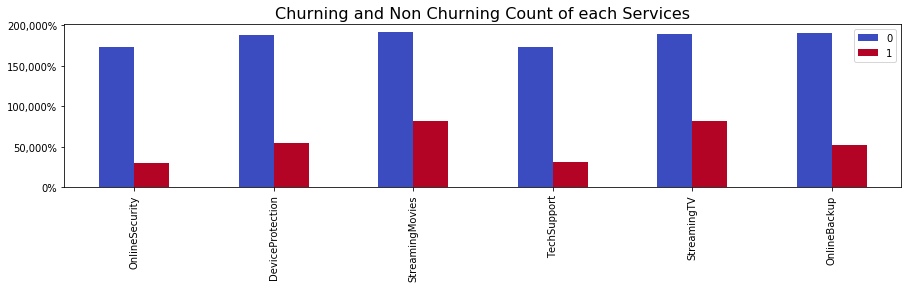

In [113]:
df_totalservicecharge=df_totalservicecharge.replace('Yes',1).replace('No',0)
df_totalservicecharge=df_totalservicecharge[totalservice['OnlineSecurity']!='No internet service']

"""agg=df_totalservicecharge.groupby('TotalService')[['OnlineSecurity', 'DeviceProtection', 
'StreamingMovies', 'TechSupport', 'StreamingTV', 'OnlineBackup']].sum()
ax=agg.T.plot(kind='bar', figsize=(15,4),sort_columns=True)
ax.legend(loc=1)"""

agg1=df_totalservicecharge.groupby('Churn')[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies', 
                                             'TechSupport', 'StreamingTV', 'OnlineBackup']].sum()
ax1=agg1.T.plot(kind='bar', figsize=(15,3),sort_columns=True,colormap='coolwarm')
ax1.legend(loc=1)
ax1.set_title('Churning and Non Churning Count of each Services',fontsize=16)
ax1.set_yticklabels(['{:,.0%}'.format(y) for y in ax1.get_yticks()])
plt.show()

Since the prices of StreamingMovies and StreamingTV are more as seen in the previous cell we see there is a higher churn rate. 

# Monthly Charges 

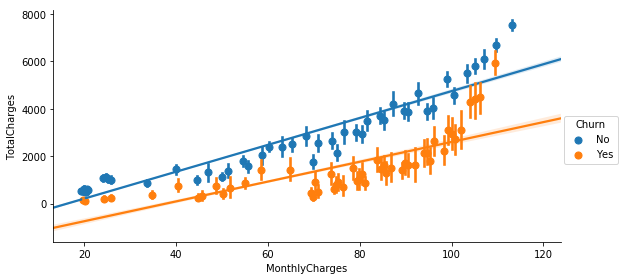

In [114]:
sns.lmplot(x='MonthlyCharges',y="TotalCharges",data=df,hue="Churn",size=4,aspect=2,x_bins=50,legend_out=True)


One of the major reason for people leaving the telecom service is the higher Monthly Charges and lesser Total Charges.It is well below 2000 for most of the churned customers which is very likely that most of them have a less tenure.
So lets check the tenure and Monthly charges in similar fashion

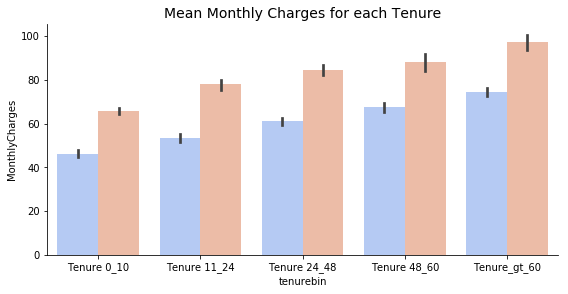

In [115]:
f = sns.FacetGrid(df,aspect=2,size=4)
f.map(sns.barplot,'tenurebin','MonthlyCharges',hue=df['Churn'],
        order=['Tenure 0_10','Tenure 11_24','Tenure 24_48','Tenure 48_60','Tenure_gt_60'],palette='coolwarm')
plt.title('Mean Monthly Charges for each Tenure',fontsize=14)
plt.show()


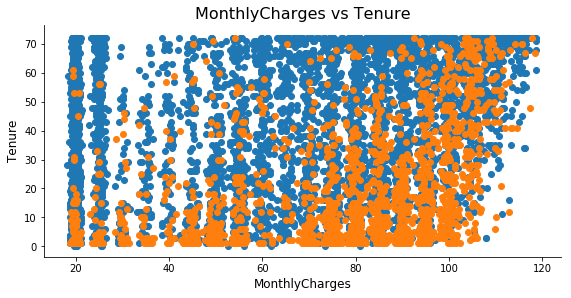

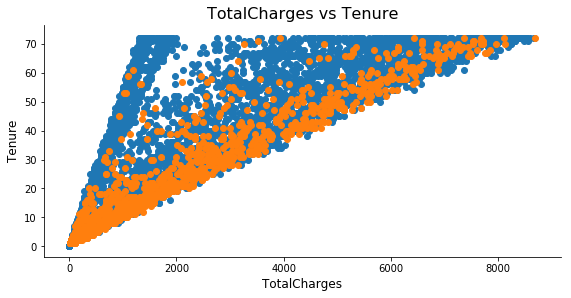

In [116]:
scatterplot('MonthlyCharges','Churn')
scatterplot('TotalCharges','Churn')

 We do see a correlation:
 
    MonthlyCharges: Higher the MonthlyCharge more is the probability to churn.
    TotalCharges: As tenure increases,if the TotalCharge amount is greater than a particular amount then it has higher chance of churning i.e for example if TotalCharge is around $4000 and tenure period is below 40 then customers do leave us.
    So we do see a linear relationship here
    

In [117]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenurebin,TotalService,ChargesperService
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure 0_10,1,29.850
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Tenure 24_48,2,28.475
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure 0_10,2,26.925
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Tenure 24_48,3,14.100
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tenure 0_10,0,70.700


# Some other EDA

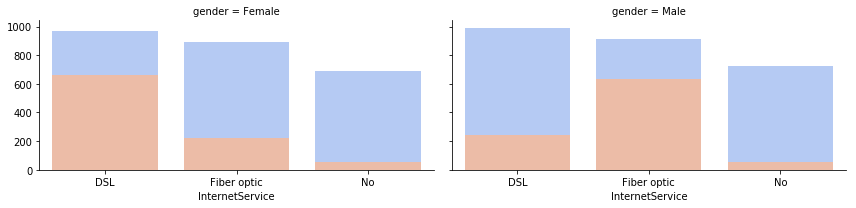

In [118]:
g=sns.FacetGrid(data=df,col='gender',hue='Churn',palette='coolwarm',aspect=2,size=3)
ax=g.map(sns.countplot,'InternetService')


    Male are more likely to leave when they have Fibre Optic as Internet Service
    Female are more likely to leave when they have DSL as Internet Service


# Machine Learning 

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score

In [120]:
print('         Non-ChurnRate vs ChurnRate  ')
print(df['Churn'].value_counts()/len(df)*100)

         Non-ChurnRate vs ChurnRate  
No     73.463013
Yes    26.536987
Name: Churn, dtype: float64


    1. The dataset is Imbalance.Accuracy will be very misleading way of measuring our metrics.We will see through an example
    2. So we will try to balance our target variable by performing Under-Sampling and Over-Sampling and again check the accuracy other metrics to evaluate our models.

Step 1 -> Replacing the values to 0 and 1

In [121]:
df.drop(['customerID','tenurebin'],axis=1,inplace=True)
categorical_cols = [c for c in df.columns if df[c].dtype == 'object'
                    or c == 'SeniorCitizen']
df_categorical = df[categorical_cols].copy()
for col in categorical_cols:
    if df_categorical[col].nunique() == 2:
        df_categorical[col], _ = pd.factorize(df_categorical[col])
    else:
        df_categorical = pd.get_dummies(df_categorical, columns=[col])

df_categorical.head(3)
df_categorical=pd.concat([df_categorical,df[['TotalCharges','MonthlyCharges','tenure']]],axis=1)

Step 2 -> Splitting the columns into train and test set

In [122]:
y = df_categorical.Churn
X = df_categorical.drop('Churn', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

Step 3 -> Functions to call the Random Forest Model and Logistic Regression Model.

In [123]:
def Dummy(X_train, X_test, y_train, y_test):
    
    '''DummyClassifier to always predict “Not Churn” just to show how misleading accuracy can be.'''
    
    dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
    dummy_pred = dummy.predict(X_test)
    print('Unique predicted labels: ', (np.unique(dummy_pred)))
    print('The accuracy of the model is {}'.format(accuracy_score(y_test,dummy_pred)))

    
def Logistic(X_train, X_test, y_train, y_test):
    lr=LogisticRegression().fit(X_train,y_train)
    log_pred=lr.predict(X_test)
    print('The accuracy of the model is {}'.format(accuracy_score(y_test,log_pred)))
    print('The f1-score of the model is {}'.format(f1_score(y_test,log_pred)))
    print('The recall-score of the model is {}'.format(recall_score(y_test,log_pred)))
    
def randomforest(X_train, X_test, y_train, y_test):
    rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

    # predict on test set
    rfc_pred = rfc.predict(X_test)
    print('The accuracy of the model is {}'.format(accuracy_score(y_test,rfc_pred)))
    print('The f1-score of the model is {}'.format(f1_score(y_test,rfc_pred)))
    print('The recall-score of the model is {}'.format(recall_score(y_test,rfc_pred)))
    d= pd.DataFrame(index=df_categorical.drop('Churn',axis=1).columns,data=rfc.feature_importances_)
    print(' ')
    print('      The top 5 important features are')
    print(d[0].sort_values(ascending=False).head())

Calculate the accuracy score,f1 score and recall score for all the 3 Algorithms

In [124]:
print('            Dummy Model           ')
Dummy(X_train, X_test, y_train, y_test)
print()
print('            Logistic Regression           ')
Logistic(X_train, X_test, y_train, y_test)
print()
print('            Random Forest Model           ')
randomforest(X_train, X_test, y_train, y_test)

            Dummy Model           
Unique predicted labels:  [0]
The accuracy of the model is 0.7234525837592277

            Logistic Regression           
The accuracy of the model is 0.8103350369108461
The f1-score of the model is 0.6107226107226107
The recall-score of the model is 0.5379876796714579

            Random Forest Model           
The accuracy of the model is 0.7830777967064169
The f1-score of the model is 0.5352798053527981
The recall-score of the model is 0.4517453798767967
 
      The top 5 important features are
TotalCharges               0.162936
tenure                     0.150650
MonthlyCharges             0.145171
Contract_Month-to-month    0.055048
TechSupport_No             0.044164
Name: 0, dtype: float64


Resampling Techniques

In [125]:
#              UPSAMPLING        

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_churn = X[X.Churn==0]
churn = X[X.Churn==1]

from sklearn.utils import resample
# upsample minority
churn_upsampled = resample(churn,
                          replace=True, # sample with replacement
                          n_samples=len(not_churn), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_churn, churn_upsampled])
y_train=upsampled.Churn
X_train=upsampled.drop('Churn',axis=1)



print('                                                     AFTER UPSAMPLING                                                 ')
print()
print('            Logistic Regression           ')
Logistic(X_train, X_test, y_train, y_test)
print()
print('            Random Forest Model           ')
randomforest(X_train, X_test, y_train, y_test)

                                                     AFTER UPSAMPLING                                                 

            Logistic Regression           
The accuracy of the model is 0.7558205565019875
The f1-score of the model is 0.6380471380471381
The recall-score of the model is 0.7782340862422998

            Random Forest Model           
The accuracy of the model is 0.7751277683134583
The f1-score of the model is 0.5550561797752809
The recall-score of the model is 0.5071868583162218
 
      The top 5 important features are
TotalCharges               0.173471
MonthlyCharges             0.139258
tenure                     0.128865
Contract_Month-to-month    0.069696
OnlineSecurity_No          0.060183
Name: 0, dtype: float64


The f1-score and the recall score have been improved by performing upsampling.Lets see how our model performs after performing undersampling

In [126]:
#          UNDERSAMPLING              
not_churn_downsampled = resample(not_churn,
                                replace = False, # sample without replacement
                                n_samples = len(churn), # match minority n
                                random_state = 27) # reproducible results
downsampled = pd.concat([not_churn_downsampled, churn])
y_train=downsampled.Churn
X_train=downsampled.drop('Churn',axis=1)



print('                                                     AFTER UNDERSAMPLING                                             ')
print()
print('            Logistic Regression           ')
Logistic(X_train, X_test, y_train, y_test)
print()
print('            Random Forest Model           ')
randomforest(X_train, X_test, y_train, y_test)

                                                     AFTER UNDERSAMPLING                                                 

            Logistic Regression           
The accuracy of the model is 0.7535491198182851
The f1-score of the model is 0.6377295492487478
The recall-score of the model is 0.784394250513347

            Random Forest Model           
The accuracy of the model is 0.750709823963657
The f1-score of the model is 0.6125330979699911
The recall-score of the model is 0.7125256673511293
 
      The top 5 important features are
TotalCharges               0.139525
MonthlyCharges             0.139309
tenure                     0.134133
Contract_Month-to-month    0.093865
OnlineSecurity_No          0.067384
Name: 0, dtype: float64


In [94]:
#Smote Sampling

from imblearn.over_sampling import SMOTE
y = df_categorical.Churn
X = df_categorical.drop('Churn', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=21,ratio=1)
X_train, y_train = sm.fit_sample(X_train, y_train)
smote = LogisticRegression().fit(X_train, y_train)
smote_pred = smote.predict(X_test)
print('                                                     SMOTE                                              ')

print('         Logistic Regression')
print('The accuracy of the model is {}'.format(accuracy_score(y_test,smote_pred)))
print('The f1-score of the model is {}'.format(f1_score(y_test,smote_pred)))
print('The recall-score of the model is {}'.format(recall_score(y_test,smote_pred)))
print()

smote = RandomForestClassifier(n_estimators=30).fit(X_train, y_train)
smote_pred = smote.predict(X_test)

print('         Random Forest')
print('The accuracy of the model is {}'.format(accuracy_score(y_test,smote_pred)))
print('The f1-score of the model is {}'.format(f1_score(y_test,smote_pred)))
print('The recall-score of the model is {}'.format(recall_score(y_test,smote_pred)))
d= pd.DataFrame(index=df_categorical.drop('Churn',axis=1).columns,data=smote.feature_importances_)
print(' ')
print('      The top 5 important features are')
print(d[0].sort_values(ascending=False).head())

                                                     SMOTE                                              
         Logistic Regression
The accuracy of the model is 0.7558205565019875
The f1-score of the model is 0.6440397350993378
The recall-score of the model is 0.7987679671457906

         Random Forest
The accuracy of the model is 0.7836456558773425
The f1-score of the model is 0.5543859649122806
The recall-score of the model is 0.486652977412731
 
      The top 5 important features are
TotalCharges                      0.109217
tenure                            0.101724
MonthlyCharges                    0.087672
Contract_Month-to-month           0.085375
PaymentMethod_Electronic check    0.069645
Name: 0, dtype: float64


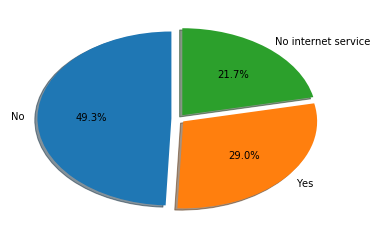

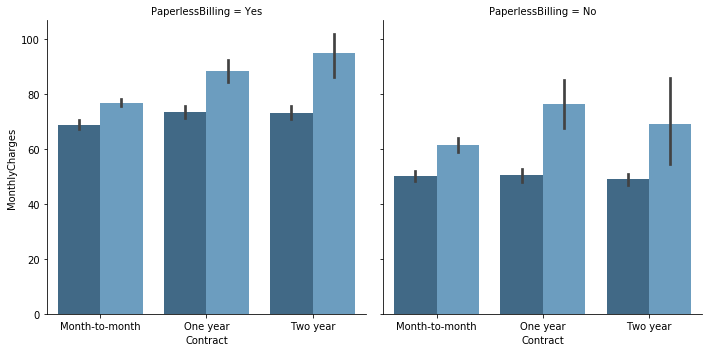

In [168]:
'''Just for Practice : Another way of visualizing'''

techsupport=df['TechSupport'].value_counts()
labels=df['TechSupport'].unique()
plt.pie(x=techsupport,radius=1,labels=labels,shadow=True,autopct='%1.1f%%',startangle=90,explode=(0.05,0.05,0.05))
plt.show()

g = sns.FacetGrid(df,col="PaperlessBilling", aspect=1,size=5)
ax = g.map(sns.barplot, "Contract","MonthlyCharges",hue=df['Churn'], palette = "Blues_d", order= ['Month-to-month', 'One year', 'Two year'])

In [169]:
# Step 4 of total service 
print('               ***********************************{}***********************************'.format(cols))
print()
print('         Montly Charges of the Customer when {} is the only Enrolled Service'.format(cols))
print('--------------------------------------------------------------------------------------------')
#print(df[(df[cols]=='Yes') & (df['TotalService']==1)].groupby(['InternetService','Churn'],as_index=False)['MonthlyCharges'].agg({'Mean':'mean',
                                                                                                   #'Count':'count'}))

               ***********************************StreamingMovies***********************************

         Montly Charges of the Customer when StreamingMovies is the only Enrolled Service
--------------------------------------------------------------------------------------------
